<a href="https://colab.research.google.com/github/priyankashinde-DS/Rossmann_sales_prediction/blob/main/ML(Supervised)_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **1. Business Problem.**


---


**The Rossmann Sales Company**

* A private drug store chain based in Germany, with main operations on Europe. Operates over 3,000 drug stores in 7 different contries.
*Offers heathcare and beauty product, including baby and body care, hygiene, cosmetics, dental hygiene, hair care, and so on.
*Business Model: Product sales.

**Problem**

* The CFO wanted to reinvest in all stores, therefore, he need to know how much revenue each store will bring so he can invest it now.

**Goal**

* Predict the daily sales of all stores for up to six weeks in advance.

# **2.Data Description**

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* **Id**- an Id that represents a (Store, Date) duple within the test set
*  **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (this is what you are predicting)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*  **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
*  **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince[Month/Year]**- gives the approximate year and month of the time the nearest competitor was opened
*  **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **3. Solution Strategy**
--
The strategy adopted was the following:

**Data Description:** I searched for NAs, checked data types (and adapted some of them for analysis) and presented a statistical description.

**Exploratory Data Analysis:** I performed univariate, bivariate and multivariate data analysis, obtaining statistical properties of each of them, correlations and testing hypothesis (the most important of them are detailed in the following section).

**Feature Engineering:** New features were created to make possible a more thorough analysis.
**Data Filtering:** Entries containing no information or containing information which does not match the scope of the project were filtered out.

**Data Preparation:** This step is necessary both for feature selection and for the machine learning models. Regarding the data types, numerical data was rescaled and categorical data was encoded.


**Machine Learning Modelling:** Some machine learning models were trained. The one that presented best results after cross-validation went through a further stage of hyperparameter fine tunning to optimize the model's generalizability.

**Hyperparameter Fine Tunning:** Found the best parameters that maximize the learning iof the model. The best parameters were found by testing a set of parameters iteratively - the set that best suit was the chosen one.



In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import SGDRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import time
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data importing**

In [3]:
# load rossmann store dataset using pandas library
rossmann_store_sale= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Supervised ML - Regression/Data & Resources/Rossmann Stores Data.csv')

# load store dataset using pandas library
store_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Supervised ML - Regression/Data & Resources/store.csv')

# **Exploratory Data Analysis(EDA)**

##**Why are we doing this EDA?**

* **Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.**

* **EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.**

In [4]:
# lets take few rows of 1st dataset
rossmann_store_sale.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# lets take look at store data
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**We can see that all the two datset rossmann_store_sale and store_data have the common row of store.This column of data would be useful for us to concanate the data in future.**

In [6]:
# check dataset shape and column names for both dataset
print(rossmann_store_sale.shape)
print(rossmann_store_sale.columns.to_list()) 

print(store_data.shape)
print(store_data.columns.to_list())

(1017209, 9)
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
(1115, 10)
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [7]:
# merge sales and store datasets
store_sale_data = pd.merge(rossmann_store_sale, store_data, how = 'inner', on = 'Store')

In [8]:
# check few rows
store_sale_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [9]:
# some last rows
store_sale_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
#Data Dimension
print( 'Number of Rows: {}'.format( store_sale_data.shape[0] ) )
print( 'Number of Columns: {}'.format( store_sale_data.shape[1] ) )

Number of Rows: 1017209
Number of Columns: 18


**We have more than 10 lac rows of data in train dataset.So this is quite large dataset.**

In [11]:
# Total feature in dataset 
store_sale_data.columns.to_list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [12]:
#Data Types
store_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**This dataset having two types of data: i)Numerical  ii)Categorical**

                                              
                                               

In [13]:
#Descriptive Statistics
store_sale_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [14]:
#Check NAN values
store_sale_data.isnull().sum().to_frame().rename(columns={0:'Missing values count'})

,Missing values count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


 **Due to the high number of missing values, the traditional methods could not be so good because if we drop or input the mean we could lose information.**


---

**competition_distance: maybe null values indicates that there're no competitors next.**

 **promo2_since_week and promo2_since_year: if there are missing values in these columns, maybe it's because the store is not participating in promo2.**

In [15]:
#check Duplicates value
store_sale_data[store_sale_data.duplicated()].count().to_frame().rename(columns={0:'Duplicate values count'})

,Duplicate values count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


 **Dataset does not have any duplicate values**

## **Univariate Analysis**



In [16]:
# Dependent/target Variable 
store_sale_data['Sales'].describe().apply(lambda x:format(x,'.2f')).to_frame()

,Sales
count,1017209.00
mean,5773.82
std,3849.93
min,0.00
25%,3727.00
50%,5744.00
75%,7856.00
max,41551.00


In [17]:
# lets calulate median of an sales
np.median(store_sale_data['Sales'])

5744.0

***An important metric to always check when looking at a distribution is how the mean compares to the median and how close are they from each other. As we see here a mean of 5773.82 versus 5744.0 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.***

Text(0.5, 1.0, 'Boxplot for Sales Values')

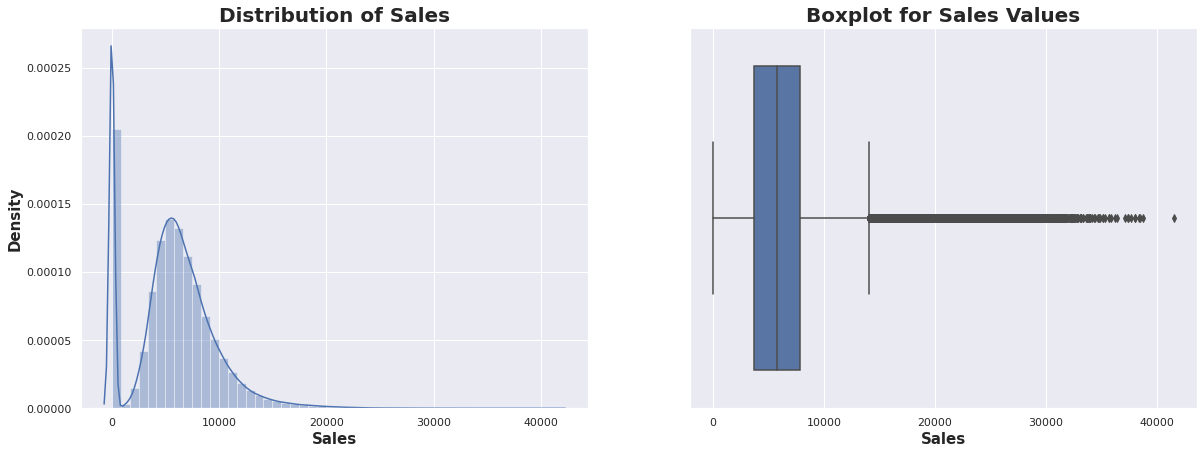

In [18]:
#distribution for sales variable
sns.set(style='darkgrid')
plt.figure( figsize = (20,7))
plt.subplot(121)
ax = sns.distplot(store_sale_data['Sales'], kde = True)
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Density',size=15,fontdict={"weight": "bold"})
ax.set_title("Distribution of Sales",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(122)
ax = sns.boxplot(store_sale_data['Sales'])
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Boxplot for Sales Values",fontsize=20,fontdict={"weight": "bold"})


In [19]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(store_sale_data[store_sale_data.Customers>1500].count()[0]/store_sale_data.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(store_sale_data[store_sale_data.Customers==0].count()[0]/store_sale_data.shape[0]*100))

3.63% of the time Rossman are actually having customers more than usual (considered outliers).
16.99% of the time Rossman are actually having no customers at all.


* **The graph of sales distribution shows a positively skewed distribution, and some data falls below 0 because some stores are closed.**

* **The graph of sales distribution shows a positively skewed distribution, and some data falls below 0 because some stores are closed.**

* **in the boxplot had to be checked to see if it's wrong inputted data but it turns out this big amount of sales on certain days is explained by either promotional purposes,the type of the store being big and popular or just not having near enough competition and being the monopoly in its region.**

* **Concerning the 16.99% (the outliers) of the time having 0 sales because some stores are closed.**




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed9ee02790>,
      dtype=object)

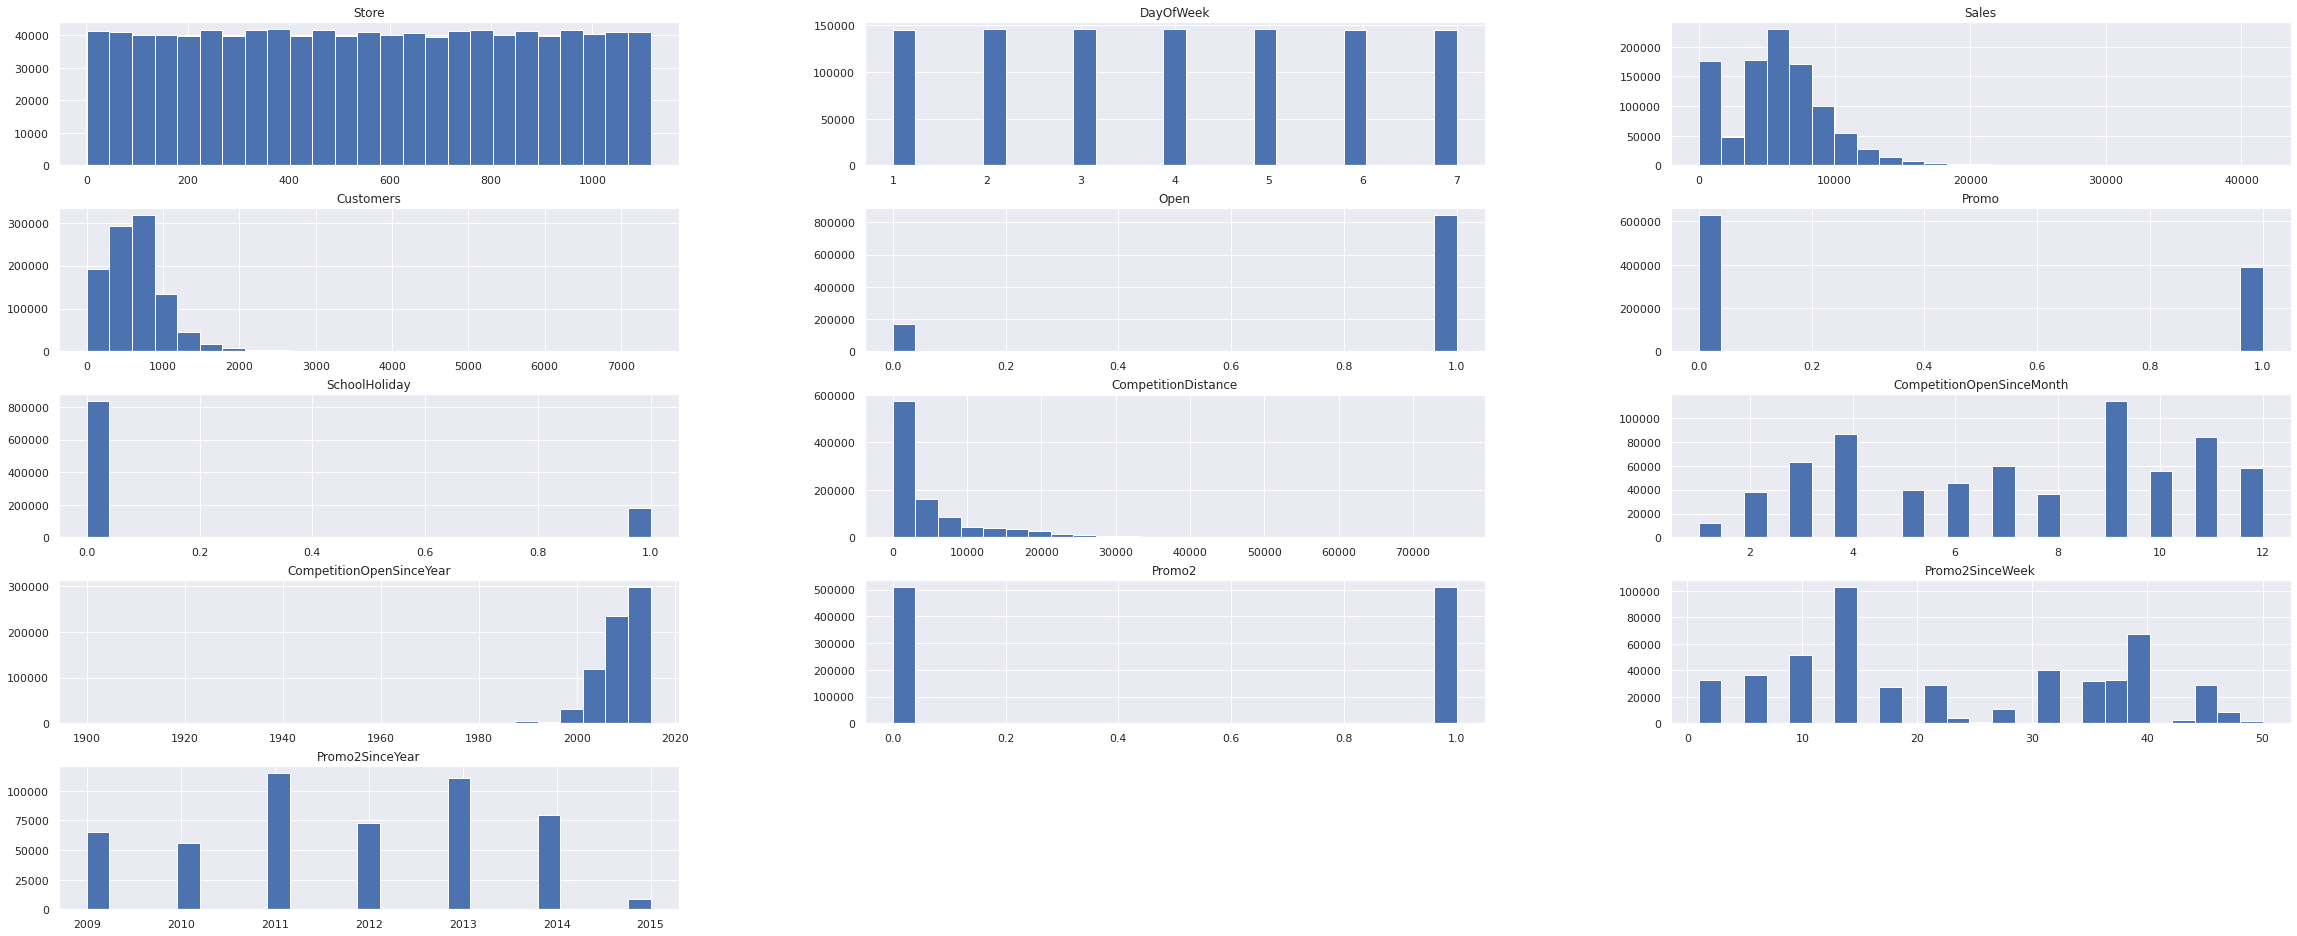

In [20]:
# select numerical variables
numerical_feature = store_sale_data.select_dtypes( include = ['int64', 'float64'])

numerical_feature.hist(bins = 25, figsize = (40,30), layout = (9,3))

# **Analyzing the histograms, for:**

* ***store: as this variable describes the unique Id for each store, there is no real information that we can extract from this one.***
---
* ***day_of_week: we have a distribution that is nearly uniform, this tells us that the sales nearly don't vary according to the day of the week. Thus, this variable, alone, doesn't have much relevance to the model.***
---
* ***sales: we can see that there were many more sales ranging from 10,000.***
* ***customers: as this variable describes the number of customers in a given day, we have a high concentration at the beginning then an abrupt decrease on this number. This behavior might be due to the peaked increase on the opening of new competitors stores, as the customers start to be distributed among the stores.***
---
* ***open: we can see that there are many more stores that were open (open = 1) than closed (open = 0).***
---
* ***promo: we can see that there are many more stores that weren't in regular promotion (promo = 0) than those who were (promo = 1).***
---
* ***school_holiday: we can see that there are many more stores that weren't affected by the closure of public schools (school_holiday = 0) than those who were (school_holiday = 1).***
---
* ***competition_distance: we have more competitors that are near the stores, as they gather in the range from 0 to near 50000.***
---
* ***competition_open_since_month: we have a somewhat seasonal opening of competitor stores.***
---

* ***competition_open_since_year: we can clearly see that the opening of new competitors stores had a peak near 2015.***
---
* ***promo2: we can see that there were almost equally number of stores in consecutive promotion. This might have been an experiment from Rossmann to check whether being on a consecutive promotion would impact the number of sales.***
---
* ***promo2_since_week: we can see there is no clear pattern, there are some peaks, but we'll need to dig deeper on this topic.***

---
* ***promo2_since_year: we can see that there were many more stores in consecutive promotion around 2014.***
---


In [21]:
# select categorical variables
cat_feat = store_sale_data.select_dtypes(exclude = ['float64','int64'])
cat_feat.columns

Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [22]:
store_sale_data['Date'].min(),store_sale_data['Date'].max()

('2013-01-01', '2015-07-31')

 **Datset having 2.5 year Rossmann Store Sales data information**

In [23]:
# create year column from date column
store_sale_data['Year'] =  pd.DatetimeIndex(store_sale_data['Date']).year

# create month column from date column
store_sale_data['Month'] =  pd.DatetimeIndex(store_sale_data['Date']).month

# create week column from date column
store_sale_data['Weekofyear'] =  pd.DatetimeIndex(store_sale_data['Date']).week

# create day column from date column
store_sale_data['Day'] = pd.DatetimeIndex(store_sale_data['Date']).day


# Since we create day week month and year column from date column ,lets drop date column
store_sale_data.drop('Date',inplace=True,axis=1)

**In Date column using DatetimeIndex function extract other features year, month and weekofyear  from Date.**

In [24]:
# check state holiday type
store_sale_data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [25]:
# replace 0 with string 0 because both are same
store_sale_data.StateHoliday = store_sale_data.StateHoliday.replace(0,'0')

Text(0.5, 1.0, 'Assortment')

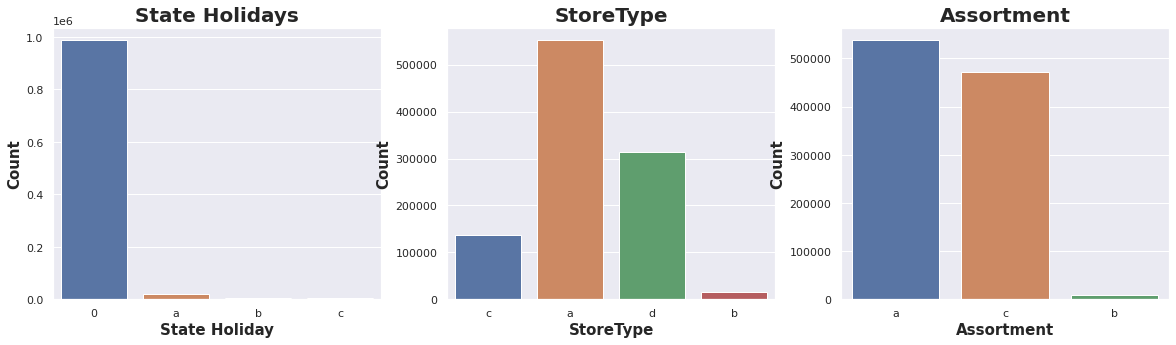

In [26]:
# state_holiday
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
ax = sns.countplot(store_sale_data['StateHoliday'])
ax.set_xlabel('State Holiday',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("State Holidays",fontsize=20,fontdict={"weight": "bold"})

# store_type
plt.subplot(1,3,2)
ax = sns.countplot(store_sale_data['StoreType'])
ax.set_xlabel('StoreType',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("StoreType",fontsize=20,fontdict={"weight": "bold"})

# assortment
plt.subplot(1,3,3)
ax=sns.countplot(store_sale_data['Assortment'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Assortment",fontsize=20,fontdict={"weight": "bold"})

**1.Taking a look at the categorical variables, we can see that state_holiday has  three holidays in this data set :-**

1.   **a = public holiday**
2.   **b = Easter holiday**
3.   **c = Christmas**

**Majority of Stores are closed on state holidays.**

---
**2.In the variable store_type, there are four different types of stores i.e( a, b, c, d)**


---



**3.In the assortment, there are three different categories.**


---

*  **a    means basic things**

* **b means extra things**

* **c means extended things so the highest variety of products.**

**---**



# **Bivariate Analysis**

Text(0.5, 1.0, 'Effect of Promo on Sales and Customers')

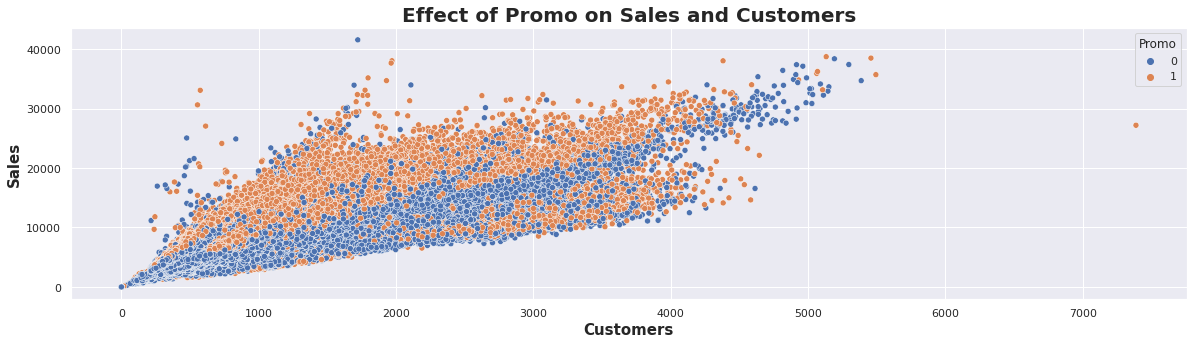

In [27]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(data=store_sale_data,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Effect of Promo on Sales and Customers",fontsize=20,fontdict={"weight": "bold"})

***We can see similair patterns with the customers column and the Sales column, in fact our pearson correlation factor of 0.82 explains that there is a strong positive correlation between Sales and Customers. In general, the more customers you have in a store, the higher your sales for the day.***

***Alse we can see that both Sales and Customers increase significantly during a Promotion. This shows that Promotions have a positive effect for a business.***

Text(0.5, 0, 'day')

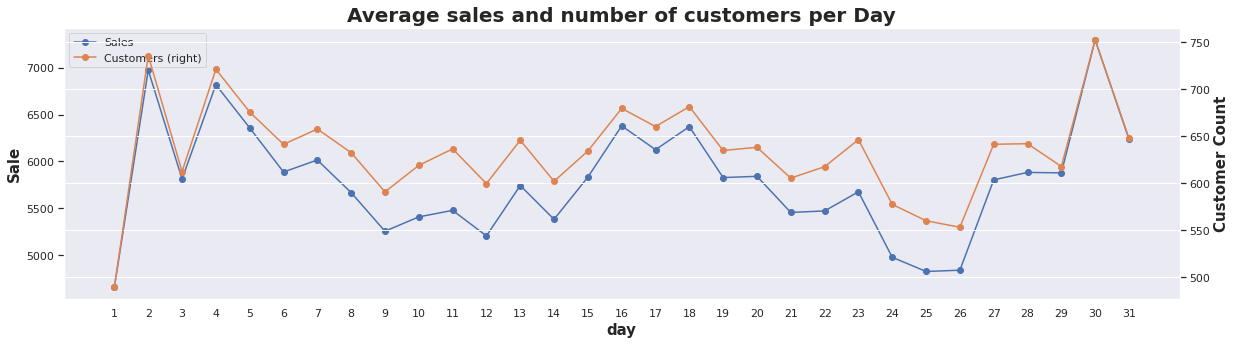

In [28]:
ax = store_sale_data.groupby('Day')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,5), marker='o')
ax.set_ylabel('Sale',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer Count',size=15,fontdict={"weight": "bold"})
ax.set_xticks(range(1,32))
plt.title('Average sales and number of customers per Day',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('day',size=15,fontdict={"weight": "bold"})

***The graph above shows that stores do sell more at the beginning of the month.***

Text(0.5, 0, 'Week Of Year')

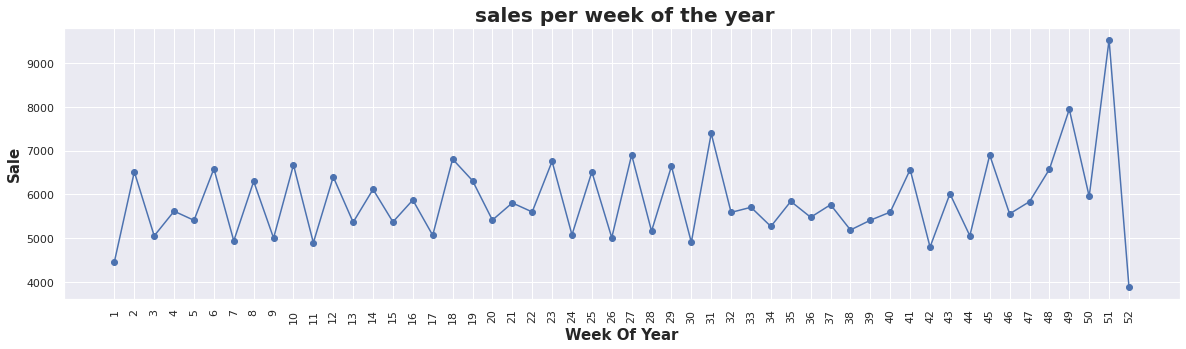

In [29]:
store_sale_data.groupby('Weekofyear')['Sales'].median().plot(figsize=(20,5), xticks=np.arange(1,53), rot=90,marker='o')
plt.title(' sales per week of the year',size=20,fontdict={"weight": "bold"})
plt.ylabel('Sale',size=15,fontdict={"weight": "bold"})
plt.xlabel('Week Of Year',size=15,fontdict={"weight": "bold"})

***It is also interesting to note that Christmas and New Year(see graph at weeks near 52) lead to increase in sales. As Rossmann Stores sells health and beauty products, it may be guessed that during Christmas and New Year people buy beauty products as they go out to celebrate and, this might the cause of sudden increase in sales.***

In [30]:
# gets total sales for each 'assortment' type
df_total_sales_by_assortment = store_sale_data[['Assortment','Sales']].groupby('Assortment').sum().reset_index()
df_total_sales_by_assortment

,Assortment,Sales
0,a,2945750070
1,b,70946312
2,c,2856484241


Text(0.5, 1.0, 'Total Sales for Assortment')

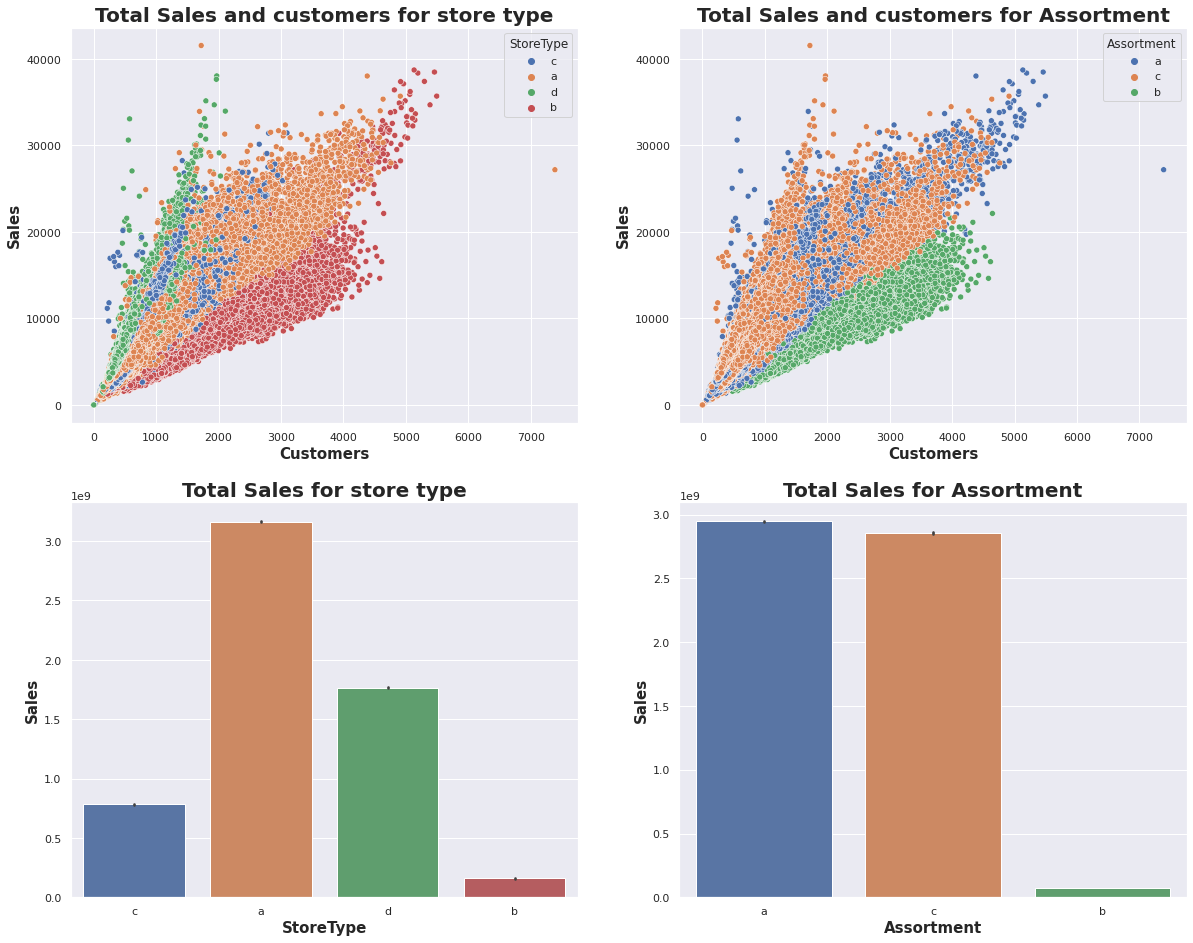

In [31]:
plt.figure(figsize=(20,16))
plt.subplot(221)
ax=sns.scatterplot(data=store_sale_data,x='Customers',y='Sales',hue='StoreType',estimator=np.sum)
ax.set_xlabel('Customers',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Total Sales and customers for store type",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(223)
ax=sns.barplot(data=store_sale_data,x='StoreType',y='Sales',estimator=np.sum)
ax.set_xlabel('StoreType',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Total Sales for store type",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(222)
ax=sns.scatterplot(data=store_sale_data,x='Customers',y='Sales',hue='Assortment',estimator=np.sum)
ax.set_xlabel('Customers',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Total Sales and customers for Assortment",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(224)
ax=sns.barplot(data=store_sale_data,x='Assortment',y='Sales',estimator=np.sum)
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Total Sales for Assortment",fontsize=20,fontdict={"weight": "bold"})

***According to the data, stores of type A have more total customers and sales.While stores of type D come in second for both Sales and Customers.In fact, stores with extended assortment sell more than those with a basic assortment, but stores with only "extra" assortment (mot extended) tend to do the best.***

Text(0.5, 1.0, 'Average sales and number of customers per DayOfWeek')

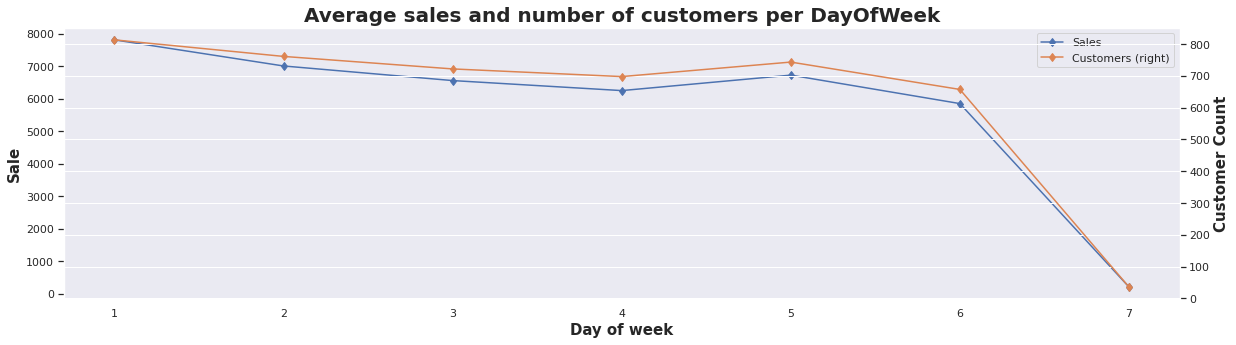

In [32]:
ax1 = store_sale_data.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,5),marker='d')
ax1.set_ylabel('Sale',size=15,fontdict={"weight": "bold"})
ax1.right_ax.set_ylabel('Customer Count',size=15,fontdict={"weight": "bold"})
ax1.set_xticks(range(1,8))
ax1.set_xlabel("Day of week",size=15,fontdict={"weight": "bold"})
plt.title('Average sales and number of customers per DayOfWeek',size=20,fontdict={"weight": "bold"})

***Since most stores are closed on Sundays, we observe that both Sales and Customers are very low on Sundays.In addition, Sales on Monday are the highest of the whole week.This could be due to Sunday being a holiday.***

Text(0.5, 1.0, 'Avg Sales and customers for State Holidays')

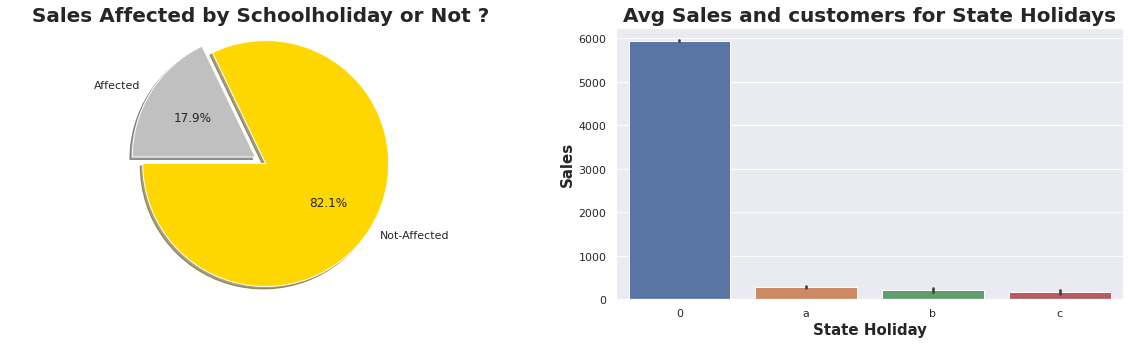

In [33]:
plt.figure(figsize=(20,5))

# pie chart for schoolholiday
plt.subplot(121)
labels = 'Not-Affected' , 'Affected'
sizes = store_sale_data.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal',size=15,fontdict={"weight": "bold"})
plt.title("Sales Affected by Schoolholiday or Not ?",size=20,fontdict={"weight": "bold"})


# countplot for sateholiday sales
plt.subplot(122)
ax = sns.barplot(data=store_sale_data,x='StateHoliday',y='Sales')
ax.set_xlabel('State Holiday',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Avg Sales and customers for State Holidays",fontsize=20,fontdict={"weight": "bold"})



**---**


***We can see that School Holidays have little impact on sales at the store and that only 17.9% of sales are affected by School Holidays.***
***As we can see, most stores are closed during state holidays.***


**---**


***However, it is interesting to note that the number of stores open during school holidays was higher than the number of stores that were open during state holidays. Another important point to note is that the stores which were open during school holidays made more sales than normal.***


***---*** 



Text(0.5, 1.0, 'Competition Distance Vs Average Sales')

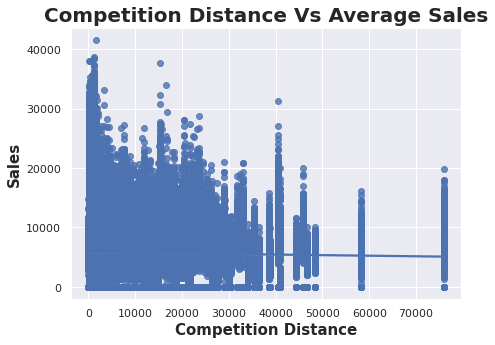

In [34]:
# regplot for competition distance vs sale
plt.figure(figsize=(7,5))
ax=sns.regplot(data=store_sale_data,x='CompetitionDistance',y='Sales')
ax.set_xlabel('Competition Distance',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Competition Distance Vs Average Sales",fontsize=20,fontdict={"weight": "bold"})

***We see a non linear Relationship between Sales and competition Distance.***

***Competition Distance is the distance of other store with the Rossmann Store.We can see that when the competition disance is low then the sales is more.This is counter intutive that if there are competitors aroud you then your sales is also more.*** 

***This is because store are more in urban areas. And in urban areas the stores of competitors are also present.Sales happen more in Urban areas that is why even if competitors are nearby the sales are more.***

In [35]:
# Missing value treatment for cometitiondistance column
store_sale_data['CompetitionDistance'] = store_sale_data['CompetitionDistance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

***The maximum distance is 75,860m. So, if the value is missing, I will input 200,000m.***


---


***I'll assume that if the value is missing it's because there'no competitor close to the store. Thus if I input a distance greater than the maximum distance of the column it's the same as there'no competitor close.***

Text(0.5, 1.0, 'Stores participating in promo2')

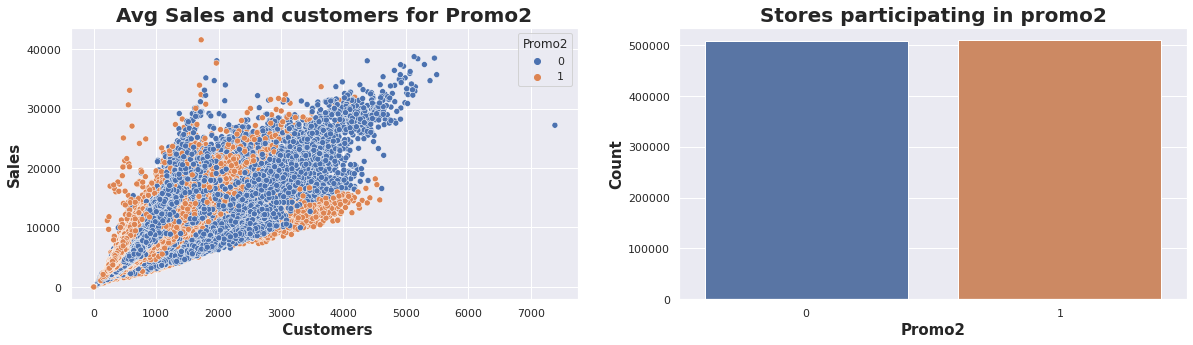

In [36]:
# plot for promo2
plt.figure(figsize=(20,5))
plt.subplot(121)
ax = sns.scatterplot(data=store_sale_data,x='Customers',y='Sales',hue='Promo2')
ax.set_xlabel(' Customers',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Avg Sales and customers for Promo2",fontsize=20,fontdict={"weight": "bold"})

# plot for promo2
plt.subplot(122)
ax = sns.countplot(store_sale_data['Promo2'])
ax.set_xlabel('Promo2',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Stores participating in promo2",fontsize=20,fontdict={"weight": "bold"})





---




* ***From above we see that stores  participating in promo and non participating in promo2 are quite equal numbers.***


---


* ***we check more granularly at the Promo2 variable (indicating a contunious promotion blue vs orange) we see that in general when there is no consecutive promotion stores tend to sell more then with consecutive promotion. This is probably a solution they're putting in place to treat stores with very low sales in the first place. And indeed when checking the Sales per Customer over promotion we understand that initially those stores suffer from low sales and those continuous promotion shows a tremending increase in the buying power of customers.***


---



* ***This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.***


---



* ***Having no promotion means those fields have to be 0 as well since they are linked to Promo2.***



---



In [37]:
# since there no use of column Promo2SinceWeek,Promo2SinceYear,PromoInterval lets remove it
store_sale_data.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],inplace=True,axis=1)

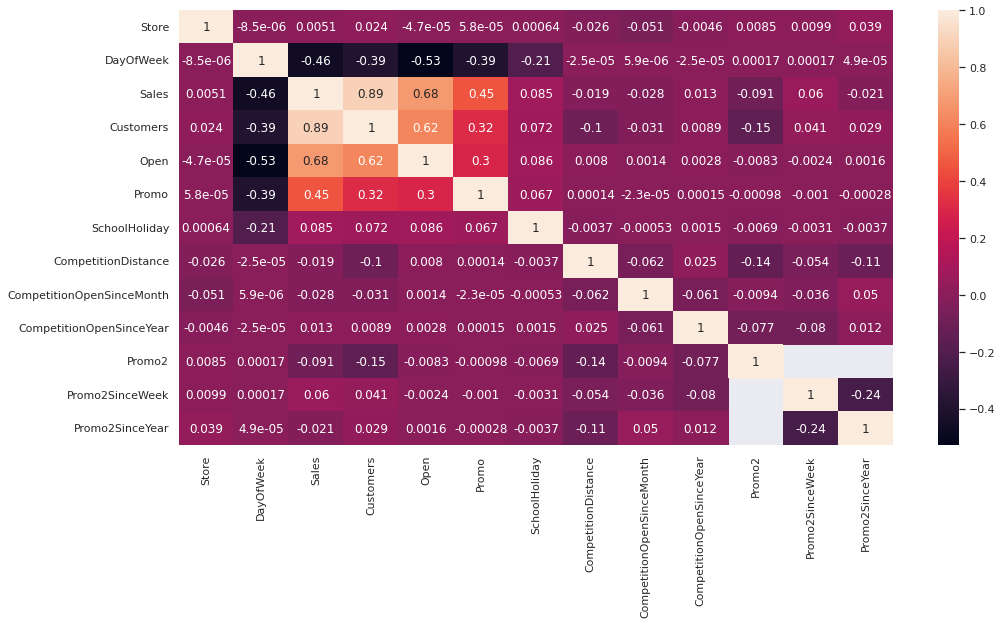

In [38]:
# gets the correlation between the numerical variables
correlation = numerical_feature.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(16, 8)

# plots the heatmap
sns.heatmap(correlation, annot=True)

# displays the plot
plt.show()

* ***We can first see the 0.89 between Customers and sales which suggests that they are positively correlated like we stated above in the analysis.***

# **Conclusions of EDA:**
---
*  ***The most selling and crowded store type is A.***



* ***Sales is highly correlated to number of Customers.***

* ***For all stores, Promotion leads to increase in Sales and Customers both.***

* ***The stores which are opened during School Holiday have more sales than normal days.***

* ***More stores are opened during School holidays than State holidays.***

* ***Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.***


# **Feature Engg.**

In [39]:
# convert int to str using astype
store_sale_data['CompetitionOpenSinceMonth'] = store_sale_data['CompetitionOpenSinceMonth'].astype('str',errors='ignore')

# convert int to str using astype
store_sale_data['CompetitionOpenSinceYear'] = store_sale_data['CompetitionOpenSinceYear'].astype('str',errors='ignore')

# replace NaN valuess for month with 0
store_sale_data['CompetitionOpenSinceMonth'] = store_sale_data['CompetitionOpenSinceMonth'].replace('<NA>',0)

#again convert str to float using astype
store_sale_data['CompetitionOpenSinceMonth'] = store_sale_data['CompetitionOpenSinceMonth'].astype(float)

# for CompetitionOpenSinceYear replace NaN with 1990
store_sale_data['CompetitionOpenSinceYear'] = store_sale_data['CompetitionOpenSinceYear'].replace('nan',0)


In [40]:
# using astype convert str to float
store_sale_data['CompetitionOpenSinceYear'] = store_sale_data['CompetitionOpenSinceYear'].astype(float)

In [41]:
# create function to change dtype float to int and replace below 1990 value with 1990
def replace_fun(i):
  if i < 1990:
    i = int(1990)
    return i
  else:
    return int(i)

In [42]:
# call function using apply
store_sale_data['CompetitionOpenSinceYear'] = store_sale_data['CompetitionOpenSinceYear'].apply(lambda x: replace_fun(x))

In [43]:
# create new column CompetitionOpenSince from CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store_sale_data['CompetitionOpenSince'] = np.where((store_sale_data['CompetitionOpenSinceMonth']==0) | (store_sale_data['CompetitionOpenSinceYear']==0) , 0,(abs(store_sale_data.Month - store_sale_data.CompetitionOpenSinceMonth) + 
                                                 
                                       (12 * (2015 - store_sale_data.CompetitionOpenSinceYear)) ))

In [44]:
#Since we create competitionOpenSince,lets dropCompetitionOpenSinceMonth,CompetitionOpenSinceYear columns
store_sale_data.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],inplace=True,axis=1)


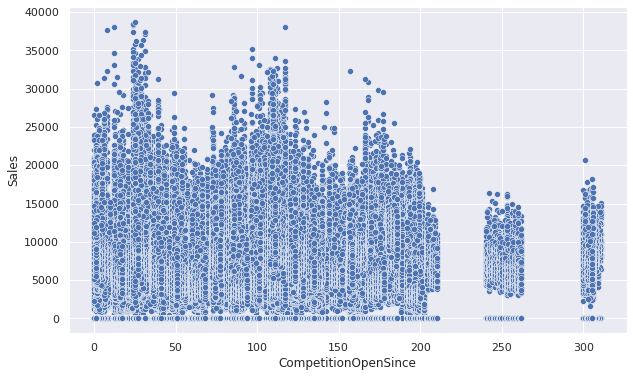

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=store_sale_data,x='CompetitionOpenSince',y='Sales')

In [46]:
# lets divide the competitionopensince into three parts
store_sale_data['CompetitionOpenSince'] = store_sale_data['CompetitionOpenSince'].apply(lambda x: 'a' if x<=50 else ('c' if x >= 200 else 'b'))

# **Outlier Treatment**

In [47]:
# create z_score column  
store_sale_data['Z_score'] = abs(stats.zscore(store_sale_data['Sales']))

In [48]:
# create datframe which does not have outliers using z_score
no_outlier_df = store_sale_data[store_sale_data['Z_score'] < 3 ]

# create dataframe for outliers
outlier_df = store_sale_data[store_sale_data['Z_score'] > 3 ]

Text(0.5, 1.0, 'Using z_score')

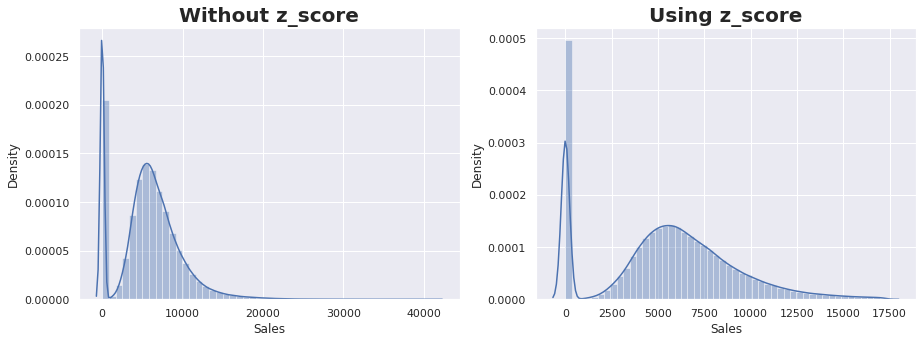

In [49]:
# plot graph for sales column before and after applying zscore method
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(store_sale_data['Sales'])
plt.title("Without z_score",fontsize=20,fontdict={"weight": "bold"})
plt.subplot(122)
sns.distplot(no_outlier_df['Sales'])
plt.title("Using z_score",fontsize=20,fontdict={"weight": "bold"})

***Graph shows data before and after removing outliers. As can be seen here, z scores are not the correct technique to remove outliers as data is still skewed and outliers still remain.***

In [50]:
# since there is no use of zscore lets drop it
store_sale_data.drop('Z_score',inplace=True,axis=1)

Text(0.5, 1.0, 'After outlier treatment Using IQR')

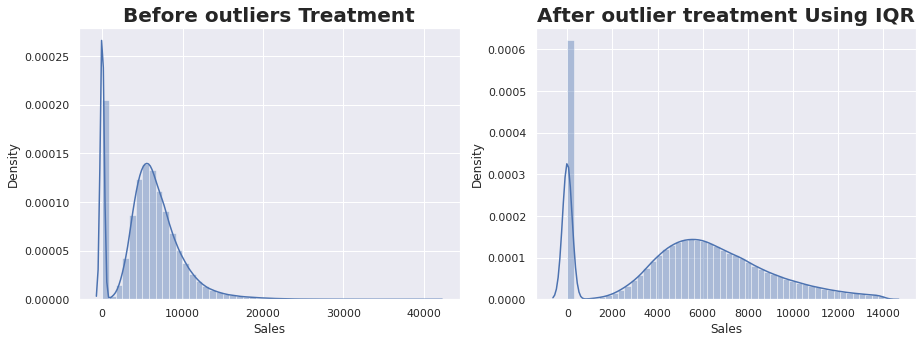

In [51]:
# Calulate iqr range
IQR = store_sale_data['Sales'].quantile(0.75) - store_sale_data['Sales'].quantile(0.25)

# calulate upper limit
upper_limit = store_sale_data['Sales'].quantile(0.75) + (1.5*(IQR))

# calulate lower limit
lower_limit = store_sale_data['Sales'].quantile(0.25) - (1.5*(IQR))

# create datframe with no outliers using IQR
iqr_df = store_sale_data[(store_sale_data['Sales'] <  upper_limit) & (store_sale_data['Sales'] > lower_limit)]

# plot graph for sales column before and after applying zscore method
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(store_sale_data['Sales'])
plt.title("Before outliers Treatment",fontsize=20,fontdict={"weight": "bold"})
plt.subplot(122)
sns.distplot(iqr_df['Sales'])
plt.title("After outlier treatment Using IQR",fontsize=20,fontdict={"weight": "bold"})

**Data before and after removing outliers using the IQR method is shown in the graph.**
**The IQR technique is not the best method for removing outliers here since the data is still negatively skewed and there are still outliers present.**

Text(0.5, 1.0, 'After outlier treatment Using Quantile method')

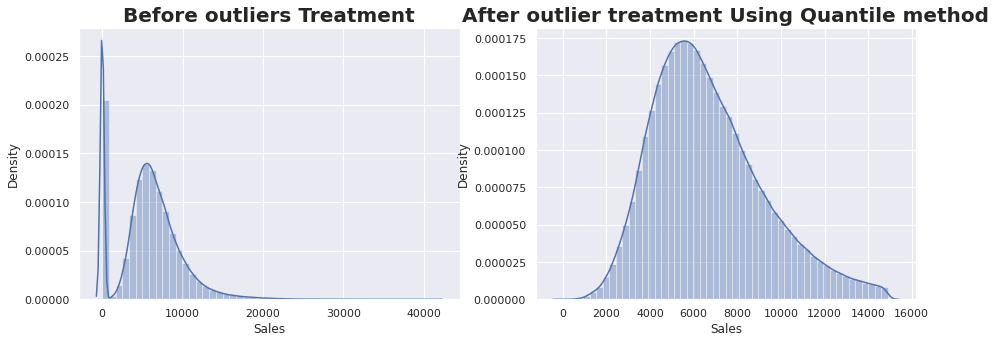

In [52]:
# create new dataframe using quantile
clean_df = store_sale_data[(store_sale_data['Sales'] > store_sale_data['Sales'].quantile(0.02)) & (store_sale_data['Sales'] < store_sale_data['Sales'].quantile(0.98))]

# plot graph for sales column before and after applying quantile method
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(store_sale_data['Sales'])
plt.title("Before outliers Treatment",fontsize=20,fontdict={"weight": "bold"})
plt.subplot(122)
sns.distplot(clean_df['Sales'])
plt.title("After outlier treatment Using Quantile method",fontsize=20,fontdict={"weight": "bold"})



**---**


***The Persentile or Quantile method is the best method for removing outliers in this dataset. It normalizes the data by using this method.***

**---**

***QuantileTransformer is used to map the data distribution Gaussian and standardize the result, centering the values on the mean value of 6681.454 and a standard deviation of 2552.394.***


**---**



# **Label Encoding**

In [53]:
clean_df["is_holiday_state"] = clean_df['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

# Delete StateHoliday column
del clean_df['StateHoliday']

In [54]:
# on sunday store having vry less sale so we put 0 for this and 1 for other days.
clean_df['is_sale_in_week'] = clean_df['DayOfWeek'].apply(lambda x : 0 if x == 7  else 1)
del clean_df['DayOfWeek']

In [55]:
# create dummies for columns
clean_df=pd.get_dummies(clean_df, columns=["Assortment", "StoreType","CompetitionOpenSince","Open"], prefix=["is_Assortment", "is_StoreType","is_CompetitionOpenSince","is_open"])

In [56]:
clean_df.columns

Index(['Store', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Weekofyear', 'Day',
       'is_holiday_state', 'is_sale_in_week', 'is_Assortment_a',
       'is_Assortment_b', 'is_Assortment_c', 'is_StoreType_a',
       'is_StoreType_b', 'is_StoreType_c', 'is_StoreType_d',
       'is_CompetitionOpenSince_a', 'is_CompetitionOpenSince_b',
       'is_CompetitionOpenSince_c', 'is_open_1'],
      dtype='object')

In [57]:
# create copy
df=clean_df.copy()

In [58]:
df['CompetitionDistance'] = df['CompetitionDistance'].astype(np.int64)

In [59]:
linear_model_df = df.drop('Sales',axis=1)

In [60]:
def get_vif(x):
  vif=pd.DataFrame()
  vif['Feature']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values,i) for  i in range(x.shape[1])]

  return  vif

In [61]:
get_vif(linear_model_df)

,Feature,VIF
0,Store,1.007877
1,Customers,1.436588
2,Promo,1.083413
3,SchoolHoliday,1.038511
4,CompetitionDistance,1.049723
5,Promo2,1.072530
6,Year,1.078404
7,Month,13.941455
8,Weekofyear,13.749798
9,Day,1.058408


***Here we can see that there are many variables which have VIF equal to infinity. This shows the presence of multi-collinearity. Also there are significant number of features which have high VIF value. Now we will try removing them one by one and check which varaible decreases the overall VIF of the data.***

In [62]:
linear_model_df.drop(['is_CompetitionOpenSince_a','is_CompetitionOpenSince_b','Month','is_Assortment_b','is_Assortment_a','is_Assortment_c',
                      'is_StoreType_a','is_StoreType_b','is_StoreType_c','is_StoreType_d','is_open_1'], axis=1,inplace=True)

In [63]:
get_vif(linear_model_df)

,Feature,VIF
0,Store,3.998446
1,Customers,6.810584
2,Promo,1.897074
3,SchoolHoliday,1.251520
4,CompetitionDistance,1.267136
5,Promo2,2.142360
6,Year,288.365561
7,Weekofyear,3.739163
8,Day,4.433212
9,is_holiday_state,1.002406


***Here we see that Week_of_year VIF value decreased from 13.74 to 1.08***

In [64]:
linear_model_df.drop(['is_sale_in_week','Year'], axis=1,inplace=True)

In [65]:
get_vif(linear_model_df)

,Feature,VIF
0,Store,3.408914
1,Customers,4.660675
2,Promo,1.847322
3,SchoolHoliday,1.246836
4,CompetitionDistance,1.204054
5,Promo2,1.853563
6,Weekofyear,3.307568
7,Day,3.537397
8,is_holiday_state,1.002274
9,is_CompetitionOpenSince_c,1.015946


In [66]:
dependent_variable = 'Sales'

# Create a list of independent variables
independent_variables = linear_model_df.columns
print(independent_variables)

Index(['Store', 'Customers', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'Promo2', 'Weekofyear', 'Day', 'is_holiday_state',
       'is_CompetitionOpenSince_c'],
      dtype='object')


In [67]:
# Create the data of independent variables
X = df[independent_variables]

# Create the dependent variable data
y = df[dependent_variable]

In [68]:
df[independent_variables]

,Store,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Weekofyear,Day,is_holiday_state,is_CompetitionOpenSince_c
0,1,555,1,1,1270,0,31,31,0,0
1,1,546,1,1,1270,0,31,30,0,0
2,1,523,1,1,1270,0,31,29,0,0
3,1,560,1,1,1270,0,31,28,0,0
4,1,612,1,1,1270,0,31,27,0,0
...,...,...,...,...,...,...,...,...,...,...
1017202,1115,471,1,1,5350,1,2,7,0,0
1017204,1115,339,0,1,5350,1,1,5,0,0
1017205,1115,326,0,1,5350,1,1,4,0,0
1017206,1115,300,0,1,5350,1,1,3,0,0


In [69]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
print('Training Data Count:', X_train.shape[0])
print('Testing Data Count::', X_test.shape[0])

Training Data Count: 659193
Testing Data Count:: 164799


In [71]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# lets check few train datapoints
X_train[0:15]

array([[-0.33437502,  2.12937371,  1.12852007, -0.48839109, -0.01923933,
         0.99100366,  1.7742885 , -1.36788556, -0.03073222,  8.92606874],
       [ 1.21795295,  1.17693613,  1.12852007, -0.48839109, -0.41977439,
         0.99100366, -0.10926109,  1.74954366, -0.03073222, -0.1120314 ],
       [-0.2073382 , -0.41252139,  1.12852007,  2.04753942, -0.10614043,
         0.99100366,  0.51858877,  1.74954366, -0.03073222, -0.1120314 ],
       [-1.3413742 ,  2.36129845, -0.88611628, -0.48839109, -0.41582434,
        -1.00907801, -0.73711095,  1.17224196, -0.03073222, -0.1120314 ],
       [-0.98505141, -1.0773723 , -0.88611628, -0.48839109, -0.38817399,
        -1.00907801, -1.22543862, -1.02150453, -0.03073222, -0.1120314 ],
       [-1.50869099, -0.13421171, -0.88611628, -0.48839109,  0.90665237,
         0.99100366,  0.0302611 , -0.67512351, -0.03073222, -0.1120314 ],
       [ 0.89261475, -0.04144181, -0.88611628, -0.48839109,  0.22408375,
         0.99100366, -1.36496082,  0.71040059

# **Baseline Models**

In [73]:
# Importing Linear Regression Model
lr = LinearRegression()
# Importing Linear Regression Lasso Model
lasso = Lasso(random_state=0)
# Importing Linear Regression Ridge Model
ridge = Ridge(random_state=0)
# Importing KN Regression Model
knn = neighbors.KNeighborsRegressor()
# Importing SVR Model
svm = SVR(kernel='rbf')
# Importing Random Forest Regressor Model
rf = RandomForestRegressor(random_state=0)
# Importing Gradient Boosting Regressor Model
gbr = GradientBoostingRegressor(random_state=0)
# Importing XGB Regressor Model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
# Importing LGBM Regressor Model
lgbm = LGBMRegressor(random_state=0)

In [74]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df1=pd.DataFrame(columns=df_columns)
    i=0
#read model one by one
    for model in models:
        model.random_state=0
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)      
               
        #insert in dataframe
        df1.loc[i,"Model_Name"]=model.__class__.__name__
        
        df1.loc[i,'Train R2'] = r2_score(y_train,train_pred) 
        df1.loc[i,'Test R2'] = r2_score(y_test,test_pred) 
        
        df1.loc[i,'Train RMSE'] = sqrt(mean_squared_error(y_train,train_pred) ) 
        df1.loc[i,'Test RMSE'] = sqrt(mean_squared_error(y_test,test_pred) ) 
        
        df1.loc[i,'Train MAE'] = mean_absolute_error(y_train, train_pred) 
        df1.loc[i,'Test MAE'] = mean_absolute_error(y_test,test_pred) 
        
        i+=1

    return(df1)


In [75]:
models=[lr,lasso,ridge]

In [76]:
model_score = score_model(X_train,y_train,X_test,y_test)
model_score

,Model_Name,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
0,LinearRegression,0.673675,0.675876,1457.476763,1455.406714,1079.517416,1080.533796
1,Lasso,0.673674,0.675870,1457.480059,1455.420569,1079.676395,1080.692420
2,Ridge,0.673675,0.675876,1457.476763,1455.406754,1079.517785,1080.534176


In [77]:
models = [gbr,xgbr,lgbm]

model_score_2 = score_model(X_train,y_train,X_test,y_test)
model_score_2

,Model_Name,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
0,GradientBoostingRegressor,0.803470,0.802872,1131.072612,1135.017590,848.182322,849.876943
1,XGBRegressor,0.803785,0.803244,1130.168126,1133.946283,847.186209,848.931999
2,LGBMRegressor,0.883419,0.882428,871.144598,876.559708,663.358121,665.964916


In [78]:
models = [knn]

model_score_3 = score_model(X_train,y_train,X_test,y_test)
model_score_3

,Model_Name,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
0,KNeighborsRegressor,0.880581,0.817261,881.686076,1092.809154,635.965075,792.145716


In [ ]:
models = [svm]

model_score_3 = score_model(X_train,y_train,X_test,y_test)
model_score_3

In [ ]:
models = [rf]

model_rf_score = score_model(X_train,y_train,X_test,y_test)
model_rf_score

 ▶ **Regression accuracy metrics**

   **The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.**

  * **MAE (Mean absolute error)**represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
  
* **MSE (Mean Squared Error)** represents the difference between the original and predicted values extracted by squared the average difference over the data set.

* **RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

* **R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

**Why R2 is the metric ?**



* **R2 score** is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.